### 복사와 뷰

In [2]:
#B와 A는 값과 주소가 동일하다
import numpy as np
A=np.arange(12)
B=A
B is A

True

In [3]:
B.shape=3,4
A.shape

(3, 4)

In [4]:
B[::2]=0
B

array([[0, 0, 0, 0],
       [4, 5, 6, 7],
       [0, 0, 0, 0]])

In [5]:
A

array([[0, 0, 0, 0],
       [4, 5, 6, 7],
       [0, 0, 0, 0]])

In [6]:
def f(x):
    print(id(x))

In [9]:
id(A)==id(B)

True

### 얕은 복사 뷰

In [10]:
# 뷰는 값만 참조한다
C=A.view()
C is A

False

In [11]:
C.flags.owndata

False

In [12]:
C.base is A

True

In [13]:
C.shape=(2,6)
A.shape,C.shape

((3, 4), (2, 6))

In [14]:
A[0,:]=[1,2,3,4]
A

array([[1, 2, 3, 4],
       [4, 5, 6, 7],
       [0, 0, 0, 0]])

In [15]:
C

array([[1, 2, 3, 4, 4, 5],
       [6, 7, 0, 0, 0, 0]])

In [17]:
S=A[:,1:3]
S

array([[2, 3],
       [5, 6],
       [0, 0]])

In [18]:
S[:,1]=10
S

array([[ 2, 10],
       [ 5, 10],
       [ 0, 10]])

In [19]:
A

array([[ 1,  2, 10,  4],
       [ 4,  5, 10,  7],
       [ 0,  0, 10,  0]])

### 깊은 복사 카피

In [20]:
A=np.arange(12).reshape(3,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
D=A.copy()
D is A

False

In [28]:
# D는 A와 어느 것도 공유하지 않음
D.base is A

False

In [29]:
D[0,:]=[10,20,30,40]
D

array([[10, 20, 30, 40],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### 고급 인덱싱

In [31]:
A=np.arange(12)**2

In [33]:
i=np.array([1,1,3,8,5])
A[i]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [35]:
j=np.array([[3,4],[9,7]])
A[j]

array([[ 9, 16],
       [81, 49]], dtype=int32)

In [37]:
palette=np.array([[0,0,0],
                 [255,0,0],
                 [0,255,0],
                 [0,0,255],
                 [255,255,255]], dtype=np.uint8)

In [39]:
image_index=np.array([[4,4,4,0,0,0,0,4,4,4],
[0,0,4,4,4,4,4,4,0,0],
[0,4,4,1,4,4,3,4,4,0],
[0,4,4,1,4,4,3,4,4,0],
[0,4,4,4,4,4,4,4,4,0],
[0,4,4,2,4,4,2,4,4,0],
[4,0,4,4,2,2,4,4,0,4],
[4,4,0,4,4,4,4,0,4,4],
[4,4,4,0,0,0,0,4,4,4]])

In [41]:
image_data = palette[image_index]

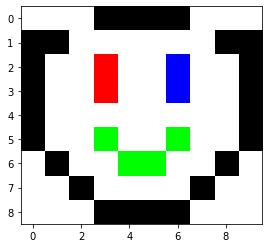

In [42]:
import matplotlib.pyplot as plt

plt.imshow(image_data,interpolation='nearest')
plt.show()

### 다차원 인덱싱

In [43]:
A=np.arange(12).reshape(3,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [52]:
ind_i=np.array([[0,1], [1,2]])
ind_j=np.array([[2,1],[3,3]])

In [45]:
A[ind_i,ind_j]
#[A[0][2], A[1][1]],[A[1][3],A[2][3]]

array([[ 2,  5],
       [ 7, 11]])

In [46]:
A[ind_i,:]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [47]:
A[ind_i]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [48]:
A[ind_i,2]

array([[ 2,  6],
       [ 6, 10]])

In [55]:
#sin함수를 전체 실행해서 값을 변환
data=np.sin(np.arange(20)).reshape(5,4)
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [58]:
#각 열에서 가장큰 값의 인덱스를 찾는다.
print(data)
ind=data.argmax(axis=0)
ind

[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]


array([2, 0, 3, 1], dtype=int64)

In [61]:
# [],[] 를 사용해서 값을 가져온다
data_max=data[ind,range(data.shape[1])]
data_max

4


array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [62]:
other_data=np.arange(20).reshape(5,4)
other_data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [64]:
other_data[data.argmax(axis=0), range(data.shape[1])]

array([ 8,  1, 14,  7])

In [65]:
#인덱싱을 이용한 값 변경
A=np.arange(5)
A[[1,3,4]]=0
A

array([0, 0, 2, 0, 0])

In [67]:
A=np.arange(5)
A[[0,0,2]]=[10,20,30]
A

array([20,  1, 30,  3,  4])

In [68]:
#논리 배열을 이용한 인덱싱
A=np.arange(20).reshape(4,5)
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [69]:
A%2==0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [70]:
A[A%2==0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [71]:
#짝수인 값들 요소들을 제곱한다
A[A%2==0]=A[A%2==0]**2
A

array([[  0,   1,   4,   3,  16],
       [  5,  36,   7,  64,   9],
       [100,  11, 144,  13, 196],
       [ 15, 256,  17, 324,  19]])

In [72]:
A[A%2==0]=0
A

array([[ 0,  1,  0,  3,  0],
       [ 5,  0,  7,  0,  9],
       [ 0, 11,  0, 13,  0],
       [15,  0, 17,  0, 19]])